In [1]:
# Import requisite packages
import matplotlib
matplotlib.use('Agg') # Run before importing matplotlib.pyplot or pylab!
import matplotlib.pyplot as plt
import hddm
import pandas as pd
import pickle
from patsy import dmatrix
from kabuki.analyze import gelman_rubin
from kabuki.utils import concat_models
import pathlib
import numpy as np
import warnings


In [2]:
print(hddm.__version__)

0.9.7


In [3]:
# Load data from csv file into a NumPy structured array
data = hddm.load_csv('DDM_data_tms.csv')  # Change this!
data.visit.unique()

array([1, 2, 3, 4])

In [4]:
data.cond.unique()

array(['Dual', 'Delay', 'Switch', 'Base'], dtype=object)

In [5]:
data=data[data.visit==1]
print(data.tail(5))

       subj_idx  visit  response      rt  acc  cond ctrl
12467        16      1       1.0  0.4946    1  Base   LL
12468        16      1       1.0  0.5917    1  Base   LL
12469        16      1       0.0  0.3890    1  Base   LL
12470        16      1       1.0  0.5813    1  Base   LL
12471        16      1       1.0  0.5814    1  Base   LL


In [6]:
# Name this model
modelName = 'm04_va_visit1'  # Change this!

In [7]:
# Check whether save directories exist; if not, create them
pathlib.Path('./Models/').mkdir(parents=True, exist_ok=True)
pathlib.Path('./Results/').mkdir(parents=True, exist_ok=True)
pathlib.Path('./Plots/' + modelName).mkdir(parents=True, exist_ok=True)

In [8]:
models = []
for i in range(5):
    m = hddm.HDDMRegressor(data,
        # Change this!
        {"v ~ C(cond, Treatment('Base'))",
        "a ~ C(cond, Treatment('Base'))"},
        group_only_regressors=True,
        p_outlier=.05,
        include={'z'})
                           

    m.find_starting_values()
    m.sample(2200, burn=200, dbname='./Models/'+modelName+'_%s.db'%i, db='pickle')
    m.save('./Models/'+modelName+'_%s'%i)
    models.append(m)

No model attribute --> setting up standard HDDM
Set model to ddm


/Users/jongminlee/opt/anaconda3/envs/onlyhddm/lib/python3.6/site-packages/scipy/optimize/optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


 [-----------------100%-----------------] 2201 of 2200 complete in 1200.4 secNo model attribute --> setting up standard HDDM
Set model to ddm


/Users/jongminlee/opt/anaconda3/envs/onlyhddm/lib/python3.6/site-packages/scipy/optimize/optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


 [-----------------100%-----------------] 2200 of 2200 complete in 1190.1 secNo model attribute --> setting up standard HDDM
Set model to ddm


/Users/jongminlee/opt/anaconda3/envs/onlyhddm/lib/python3.6/site-packages/scipy/optimize/optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


 [-----------------100%-----------------] 2200 of 2200 complete in 1197.4 secNo model attribute --> setting up standard HDDM
Set model to ddm


/Users/jongminlee/opt/anaconda3/envs/onlyhddm/lib/python3.6/site-packages/scipy/optimize/optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


 [-----------------100%-----------------] 2201 of 2200 complete in 1199.0 secNo model attribute --> setting up standard HDDM
Set model to ddm


/Users/jongminlee/opt/anaconda3/envs/onlyhddm/lib/python3.6/site-packages/scipy/optimize/optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


 [-----------------100%-----------------] 2201 of 2200 complete in 1210.4 sec

In [9]:
# Calculate Gelman-Rubin r-hat statistic
m_rhat = gelman_rubin(models)
pd.DataFrame.from_dict(m_rhat, orient='index').to_csv('./Results/'+modelName+'_RHat.csv')


# Save traces of concatenated model (only valid to look at if converged!)
m_comb = concat_models(models)
m_comb_export = m_comb.get_traces()
m_comb_export.to_csv('./Results/'+modelName+'_traces.csv')

In [10]:
# List figures to be saved
# Change this!
convergeCheck = [
't', 't_std',
'z', 'z_std',

'v_Intercept', 'v_Intercept_std',
'a_Intercept', 'a_Intercept_std',

'v_C(cond, Treatment(\'Base\'))[T.Dual]',
'v_C(cond, Treatment(\'Base\'))[T.Delay]',
'v_C(cond, Treatment(\'Base\'))[T.Switch]',

'a_C(cond, Treatment(\'Base\'))[T.Dual]',
'a_C(cond, Treatment(\'Base\'))[T.Delay]',
'a_C(cond, Treatment(\'Base\'))[T.Switch]'
]

# Save convergence figures
for i in convergeCheck:
    fig = m_comb.plot_posteriors(i)
    plt.savefig('./Plots/' + modelName + '/' + i + '.pdf')



#####
#####  GET DIC
#####

print("DIC: %f" %m_comb.dic)

Plotting t
Plotting t_std
Plotting z
Plotting z_std
Plotting v_Intercept
Plotting v_Intercept_std
Plotting a_Intercept
Plotting a_Intercept_std
Plotting v_C(cond, Treatment('Base'))[T.Dual]
Plotting v_C(cond, Treatment('Base'))[T.Delay]
Plotting v_C(cond, Treatment('Base'))[T.Switch]
Plotting a_C(cond, Treatment('Base'))[T.Dual]
Plotting a_C(cond, Treatment('Base'))[T.Delay]
Plotting a_C(cond, Treatment('Base'))[T.Switch]
DIC: 2323.024352


In [11]:
plt.close('all')

In [11]:
# Name this model
modelName = 'm04_va_visit1'  # Change this!

# Load previously estimated models
m0 = pickle.load(open('./Models/'+modelName+'_0', 'rb'))
m1 = pickle.load(open('./Models/'+modelName+'_1', 'rb'))
m2 = pickle.load(open('./Models/'+modelName+'_2', 'rb'))
m3 = pickle.load(open('./Models/'+modelName+'_3', 'rb'))
m4 = pickle.load(open('./Models/'+modelName+'_4', 'rb'))

# Combine traces
models = [m0, m1, m2, m3, m4]
m_comb = concat_models(models)
print("DIC: %f" %m_comb.dic)

DIC: 1910.959642


In [12]:
m_comb.nodes_db.node.unique()

array([<pymc.distributions.new_dist_class.<locals>.new_class 't' at 0x7fe792535278>,
       <pymc.distributions.new_dist_class.<locals>.new_class 't_std' at 0x7fe792535518>,
       <pymc.PyMCObjects.Deterministic 't_rate' at 0x7fe792535550>,
       <pymc.PyMCObjects.Deterministic 't_shape' at 0x7fe792535630>,
       <pymc.distributions.new_dist_class.<locals>.new_class 't_subj.0' at 0x7fe792593c50>,
       <pymc.distributions.new_dist_class.<locals>.new_class 't_subj.1' at 0x7fe792593e48>,
       <pymc.distributions.new_dist_class.<locals>.new_class 't_subj.2' at 0x7fe7c587a588>,
       <pymc.distributions.new_dist_class.<locals>.new_class 't_subj.3' at 0x7fe792593ef0>,
       <pymc.distributions.new_dist_class.<locals>.new_class 't_subj.4' at 0x7fe792535400>,
       <pymc.distributions.new_dist_class.<locals>.new_class 't_subj.5' at 0x7fe7925351d0>,
       <pymc.distributions.new_dist_class.<locals>.new_class 't_subj.6' at 0x7fe7c57576a0>,
       <pymc.distributions.new_dist_class.<lo

P_v(Delay > Base) =  1.0
P_v(Delay > Base) =  0.0
P_v(Dual > Base) =  0.0993
P_v(Dual > Base) =  0.9007
P_v(Switch > Base) =  0.0386
P_v(Switch > Base) =  0.9614


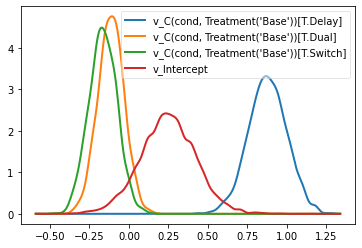

In [13]:
%matplotlib inline
regression_v_0 = m_comb.nodes_db.node[
    'v_C(cond, Treatment(\'Base\'))[T.Delay]'
]
regression_v_1 = m_comb.nodes_db.node[
    'v_C(cond, Treatment(\'Base\'))[T.Dual]'
]
regression_v_2 = m_comb.nodes_db.node[
    'v_C(cond, Treatment(\'Base\'))[T.Switch]'
]
regression_v_3 = m_comb.nodes_db.node[
    'v_Intercept'
]


# Plot posteriors
hddm.analyze.plot_posterior_nodes(
    [
     regression_v_0,
     regression_v_1,
     regression_v_2,
     regression_v_3
    ]
)

print("P_v(Delay > Base) = ", (regression_v_0.trace() > 0).mean())
print("P_v(Delay > Base) = ", (regression_v_0.trace() < 0).mean())
print("P_v(Dual > Base) = ", (regression_v_1.trace() > 0).mean())
print("P_v(Dual > Base) = ", (regression_v_1.trace() < 0).mean())
print("P_v(Switch > Base) = ", (regression_v_2.trace() > 0).mean())
print("P_v(Switch > Base) = ", (regression_v_2.trace() < 0).mean())
# print("P_v(Delay > Dual) = ", (regression_v_0.trace() > regression_v_1.trace()).mean())
# print("P_v(Delay > Switch) = ", (regression_v_0.trace() > regression_v_2.trace()).mean())

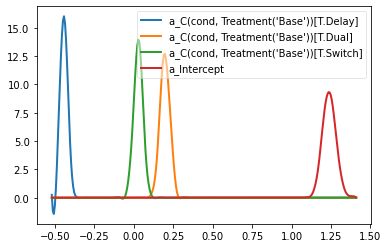

In [14]:
regression_a_0 = m_comb.nodes_db.node[
    'a_C(cond, Treatment(\'Base\'))[T.Delay]'
]
regression_a_1 = m_comb.nodes_db.node[
    'a_C(cond, Treatment(\'Base\'))[T.Dual]'
]
regression_a_2 = m_comb.nodes_db.node[
    'a_C(cond, Treatment(\'Base\'))[T.Switch]'
]
regression_a_3 = m_comb.nodes_db.node[
    'a_Intercept'
]

# Plot posteriors
hddm.analyze.plot_posterior_nodes(
    [
     regression_a_0,
     regression_a_1,
     regression_a_2,
     regression_a_3
    ]
)

In [13]:
pwd

'/Users/jongminlee/Desktop/Files/nee_lab/DDM/tms'

In [15]:
v_Dual, v_Base, v_Delay, v_Switch=m_comb.nodes_db.node[['v_C(cond, Treatment(\'Base\'))[T.Dual]', 
                                                        'v_Intercept', 
                                                        'v_C(cond, Treatment(\'Base\'))[T.Switch]', 
                                                        'v_C(cond)[Switch]']]
print("P_v(Dual > Base) = ", (v_Dual.trace() > v_Base.trace()).mean())
print("P_v(Delay > Base) = ", (v_Delay.trace() > v_Base.trace()).mean())
print("P_v(Delay > Dual) = ", (v_Delay.trace() > v_Dual.trace()).mean())
print("P_v(Delay > Switch) = ", (v_Delay.trace() > v_Switch.trace()).mean())

print("P_v(Dual < Base) = ", (v_Dual.trace() < v_Base.trace()).mean())
print("P_v(Delay < Base) = ", (v_Delay.trace() < v_Base.trace()).mean())
print("P_v(Delay < Dual) = ", (v_Delay.trace() < v_Dual.trace()).mean())
print("P_v(Delay < Switch) = ", (v_Delay.trace() < v_Switch.trace()).mean())

KeyError: "Passing list-likes to .loc or [] with any missing labels is no longer supported. The following labels were missing: Index(['v_C(cond)[Switch]'], dtype='object'). See https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike"

In [34]:
m0.plot_posterior_predictive(figsize=(14,10))

<Figure size 1008x720 with 0 Axes>

In [37]:
warnings.filterwarnings('ignore')

In [16]:
print(m_comb.nodes_db)

         knode_name stochastic observed   subj      node tag     depends  \
t                 t       True    False  False         t  ()          []   
t_std         t_std       True    False  False     t_std  ()          []   
t_rate       t_rate      False    False  False    t_rate  ()          []   
t_shape     t_shape      False    False  False   t_shape  ()          []   
t_subj.0     t_subj       True    False   True  t_subj.0  ()  [subj_idx]   
...             ...        ...      ...    ...       ...  ..         ...   
wfpt.12        wfpt      False     True  False   wfpt.12  ()  [subj_idx]   
wfpt.13        wfpt      False     True  False   wfpt.13  ()  [subj_idx]   
wfpt.14        wfpt      False     True  False   wfpt.14  ()  [subj_idx]   
wfpt.15        wfpt      False     True  False   wfpt.15  ()  [subj_idx]   
wfpt.16        wfpt      False     True  False   wfpt.16  ()  [subj_idx]   

         hidden subj_idx visit  ... cond ctrl       mean         std  \
t         False

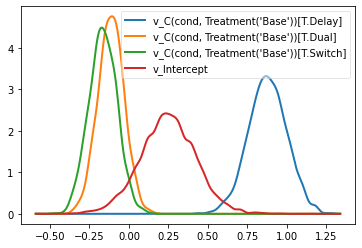

In [17]:
hddm.analyze.plot_posterior_nodes(m_comb.nodes_db.loc[['v_C(cond, Treatment(\'Base\'))[T.Delay]', 
                                                       'v_C(cond, Treatment(\'Base\'))[T.Dual]',
                                                      'v_C(cond, Treatment(\'Base\'))[T.Switch]',
                                                      'v_Intercept'], 'node'])

In [18]:
import pymc as pm
import numpy as np
import pymc.progressbar as pbar

def _parents_to_random_posterior_sample(bottom_node, pos=None):
    """Walks through parents and sets them to pos sample."""
    for i, parent in enumerate(bottom_node.extended_parents):
        if not isinstance(parent, pm.Node): # Skip non-stochastic nodes
            continue

        if pos is None:
            # Set to random posterior position
            pos = np.random.randint(0, len(parent.trace()))

        assert len(parent.trace()) >= pos, "pos larger than posterior sample size"
        parent.value = parent.trace()[pos]

def _post_pred_generate(bottom_node, samples=500, data=None, append_data=True):
    """Generate posterior predictive data from a single observed node."""
    datasets = []
    ##############################
    # Sample and generate stats
    for sample in range(samples):
        _parents_to_random_posterior_sample(bottom_node)
        # Generate data from bottom node
        sampled_data = bottom_node.random()
        sampled_data.reset_index(inplace=True)
        if append_data and data is not None:
            sampled_data = sampled_data.join(data.reset_index(), lsuffix='_sampled')
        datasets.append(sampled_data)
    return datasets

def post_pred_gen(model, groupby=None, samples=500, append_data=False, progress_bar=True):
    results = {}

    # Progress bar
    if progress_bar:
        n_iter = len(model.get_observeds())
        bar = pbar.progress_bar(n_iter)
        bar_iter = 0
    else:
        print("Sampling...")

    if groupby is None:
        iter_data = ((name, model.data.loc[obs['node'].value.index]) for name, obs in model.iter_observeds())
    else:
        iter_data = model.data.groupby(groupby)

    for name, data in iter_data:
        node = model.get_data_nodes(data.index)

        if progress_bar:
            bar_iter += 1
            bar.update(bar_iter)

        if node is None or not hasattr(node, 'random'):
            continue # Skip

        ##############################
        # Sample and generate stats
        datasets = _post_pred_generate(node, samples=samples, data=data, append_data=append_data)
        results[name] = pd.concat(datasets, names=['sample'], keys=list(range(len(datasets))))

    if progress_bar:
        bar_iter += 1
        bar.update(bar_iter)

    return pd.concat(results, names=['node'])


In [19]:
# Generate predicted results from previously-estimated models
# Normally, we'd want to get many, many samples - I've done 1000 in the past
# But, for the sake of time, let's just do a couple

ppc_data = post_pred_gen(m_comb, samples=1000, append_data=True)
ppc_data.to_csv('./PPC/'+modelName+'_simul_ppc-visit1.csv')
ppc_data

# ppc_data = post_pred_gen(m_comb)
# ppc_data.to_csv('./PPC/regression_ppc4.csv')

 [--------------------117%--------------------] 20 of 17 complete in 80.6 sec

index_sampled  rt_sampled  response_sampled  index  \
node    sample                                                           
wfpt.0  0      0                0    1.353437                 1      0   
               1                1   -0.512443                 0      1   
               2                2   -0.342443                 0      2   
               3                3   -1.052437                 0      3   
               4                4   -0.640442                 0      4   
...                           ...         ...               ...    ...   
wfpt.16 999    184            184    0.397508                 1  12467   
               185            185    1.336504                 1  12468   
               186            186   -0.328508                 0  12469   
               187            187   -0.390508                 0  12470   
               188            188    0.513507                 1  12471   

                    subj_idx  visit  response      rt  acc  cond ctrl  
node    sample                                                         
wfpt.0  0      0           0      1       1.0  0.9761    1  Dual   HH  
               1           0      1       1.0  0.6113    1  Dual   HH  
               2           0      1       1.0  0.4870    1  Dual   HH  
               3           0      1       0.0 -1.3333    1  Dual   HH  
               4           0      1       1.0  0.8145    1  Dual   HH  
...                      ...    ...       ...     ...  ...   ...  ...  
wfpt.16 999    184        16      1       1.0  0.4946    1  Base   LL  
               185        16      1       1.0  0.5917    1  Base   LL  
               186        16      1       0.0 -0.3890    1  Base   LL  
               187        16      1       1.0  0.5813    1  Base   LL  
               188        16      1       1.0  0.5814    1  Base   LL  

[3256000 rows x 11 columns]

In [20]:
ppc_compare = hddm.utils.post_pred_stats(data, ppc_data, call_compare=False)
print(ppc_compare.head())

               accuracy   mean_ub    std_ub   10q_ub   30q_ub  50q_ub  \
node   sample                                                           
wfpt.0 0       0.389474  0.689095  0.259422  0.47968  0.56543  0.6261   
       1       0.389474  0.689095  0.259422  0.47968  0.56543  0.6261   
       2       0.389474  0.689095  0.259422  0.47968  0.56543  0.6261   
       3       0.389474  0.689095  0.259422  0.47968  0.56543  0.6261   
       4       0.389474  0.689095  0.259422  0.47968  0.56543  0.6261   

                70q_ub   90q_ub   mean_lb    std_lb   10q_lb   30q_lb  \
node   sample                                                           
wfpt.0 0       0.69989  0.94166 -0.695324  0.340775  0.34165  0.47725   
       1       0.69989  0.94166 -0.695324  0.340775  0.34165  0.47725   
       2       0.69989  0.94166 -0.695324  0.340775  0.34165  0.47725   
       3       0.69989  0.94166 -0.695324  0.340775  0.34165  0.47725   
       4       0.69989  0.94166 -0.695324  0.34077

In [21]:
ppc_compare 

accuracy   mean_ub    std_ub   10q_ub   30q_ub  50q_ub  \
node    sample                                                           
wfpt.0  0       0.389474  0.689095  0.259422  0.47968  0.56543  0.6261   
        1       0.389474  0.689095  0.259422  0.47968  0.56543  0.6261   
        2       0.389474  0.689095  0.259422  0.47968  0.56543  0.6261   
        3       0.389474  0.689095  0.259422  0.47968  0.56543  0.6261   
        4       0.389474  0.689095  0.259422  0.47968  0.56543  0.6261   
...                  ...       ...       ...      ...      ...     ...   
wfpt.16 995     0.597884  0.534324  0.251498  0.29570  0.36678  0.4899   
        996     0.597884  0.534324  0.251498  0.29570  0.36678  0.4899   
        997     0.597884  0.534324  0.251498  0.29570  0.36678  0.4899   
        998     0.597884  0.534324  0.251498  0.29570  0.36678  0.4899   
        999     0.597884  0.534324  0.251498  0.29570  0.36678  0.4899   

                 70q_ub   90q_ub   mean_lb    std_lb   10q_lb   30q_lb  \
node    sample                                                           
wfpt.0  0       0.69989  0.94166 -0.695324  0.340775  0.34165  0.47725   
        1       0.69989  0.94166 -0.695324  0.340775  0.34165  0.47725   
        2       0.69989  0.94166 -0.695324  0.340775  0.34165  0.47725   
        3       0.69989  0.94166 -0.695324  0.340775  0.34165  0.47725   
        4       0.69989  0.94166 -0.695324  0.340775  0.34165  0.47725   
...                 ...      ...       ...       ...      ...      ...   
wfpt.16 995     0.59186  0.84124 -0.457308  0.138849  0.32585  0.37870   
        996     0.59186  0.84124 -0.457308  0.138849  0.32585  0.37870   
        997     0.59186  0.84124 -0.457308  0.138849  0.32585  0.37870   
        998     0.59186  0.84124 -0.457308  0.138849  0.32585  0.37870   
        999     0.59186  0.84124 -0.457308  0.138849  0.32585  0.37870   

                 50q_lb   70q_lb  90q_lb  
node    sample                            
wfpt.0  0       0.62455  0.78155  1.1606  
        1       0.62455  0.78155  1.1606  
        2       0.62455  0.78155  1.1606  
        3       0.62455  0.78155  1.1606  
        4       0.62455  0.78155  1.1606  
...                 ...      ...     ...  
wfpt.16 995     0.42805  0.48315  0.6093  
        996     0.42805  0.48315  0.6093  
        997     0.42805  0.48315  0.6093  
        998     0.42805  0.48315  0.6093  
        999     0.42805  0.48315  0.6093  

[17000 rows x 15 columns]

In [22]:
hddm.utils.post_pred_stats(data, ppc_data)

,observed,mean,std,SEM,MSE,credible,quantile,mahalanobis
stat,,,,,,,,
accuracy,0.540848,0.540845,0.135966,7.554529e-12,0.018487,True,35.294117,0.000020
mean_ub,0.586351,0.581469,0.104291,2.383032e-05,0.010900,True,58.823528,0.046808
std_ub,0.268719,0.235619,0.074668,1.095634e-03,0.006671,True,64.705879,0.443298
10q_ub,0.327700,0.348884,0.060634,4.487676e-04,0.004125,True,41.176472,0.349379
30q_ub,0.431500,0.447355,0.075592,2.513726e-04,0.005966,True,58.823528,0.209740
50q_ub,0.526700,0.535462,0.095288,7.676781e-05,0.009157,True,58.823528,0.091950
70q_ub,0.649200,0.625822,0.112893,5.465138e-04,0.013291,True,58.823528,0.207078
90q_ub,0.920600,0.872228,0.202538,2.339883e-03,0.043362,True,58.823528,0.238831
mean_lb,-0.554551,-0.555677,0.087592,1.268572e-06,0.007674,True,47.058823,0.012859


In [23]:
ppc_data.head(10)

index_sampled  rt_sampled  response_sampled  index  subj_idx  \
node   sample                                                                   
wfpt.0 0      0              0    1.353437                 1      0         0   
              1              1   -0.512443                 0      1         0   
              2              2   -0.342443                 0      2         0   
              3              3   -1.052437                 0      3         0   
              4              4   -0.640442                 0      4         0   
              5              5   -0.957438                 0      5         0   
              6              6   -1.060436                 0      6         0   
              7              7    0.761440                 1      7         0   
              8              8   -1.421440                 0      8         0   
              9              9    0.867439                 1      9         0   

                 visit  response      rt  acc  cond ctrl  
node   sample                                             
wfpt.0 0      0      1       1.0  0.9761    1  Dual   HH  
              1      1       1.0  0.6113    1  Dual   HH  
              2      1       1.0  0.4870    1  Dual   HH  
              3      1       0.0 -1.3333    1  Dual   HH  
              4      1       1.0  0.8145    1  Dual   HH  
              5      1       1.0  0.5656    1  Dual   HH  
              6      1       1.0  0.8310    1  Dual   HH  
              7      1       1.0  0.5571    1  Dual   HH  
              8      1       0.0 -0.7123    1  Dual   HH  
              9      1       1.0  0.5887    1  Dual   HH

In [24]:
ppc_compare.to_csv('./PPC/'+modelName+'_va_PPC_stats.csv')